In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Some helper functions

In [5]:
def wrap_function(phi):
    """Computes the wrap function elementwise for the input array.
    """

    return ( (phi + np.pi) % (2*np.pi) ) - np.pi

# Set up test data

Linear phase.

In [6]:
N = 40
phi = np.linspace(0, 9*np.pi, N) + (3*np.pi) + 3
grid = np.linspace(0,1,N)

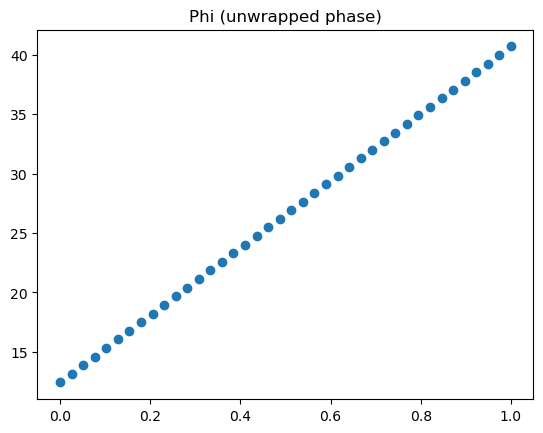

In [7]:
plt.scatter(grid, phi)
plt.title("Phi (unwrapped phase)")
plt.show()

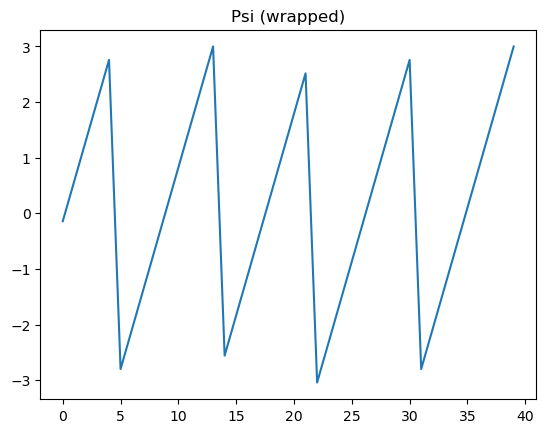

In [8]:
psi = wrap_function(phi)

plt.plot(psi)
plt.title("Psi (wrapped)")
plt.show()

# Differencing matrix

In [9]:
# Build F mat
F = np.eye(N)
np.fill_diagonal(F[1:], -1)
F = F[1:,:]

In [10]:
F.shape
print(F)

[[-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... -1.  1.  0.]
 [ 0.  0.  0. ...  0. -1.  1.]]


In [16]:
phi_diffs = F @ phi
psi_diffs = F @ psi
psi_diffs_wrapped = wrap_function(psi_diffs)

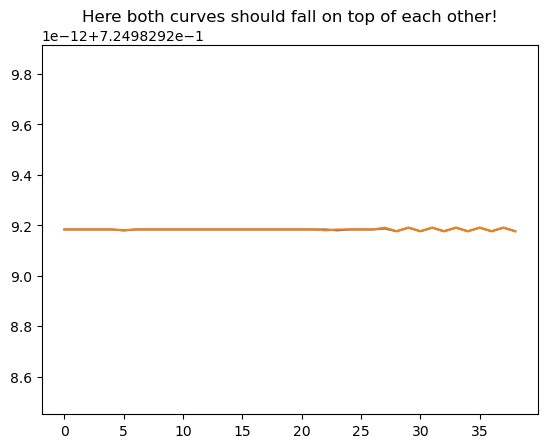

In [17]:
plt.plot(phi_diffs)
plt.plot(psi_diffs_wrapped)
plt.title("Here both curves should fall on top of each other!")
plt.show()

# Simple 1D recovery?

In [18]:
# Make $\phi_1$
phi1 = np.zeros(N)
phi1[0] = psi[0]

# Build the undersampling matrix
P = np.eye(N)[1:,:].T

# Set initial weights
weights = np.ones(F.shape[0])

# rhs vector
rhs = P.T @ F.T @ np.diag(weights) @ ( wrap_function(F @ psi) - (F @ phi1) )

# Q matrix
Q = P.T @ F.T @ np.diag(weights) @ F @ P 

# Solve system for answer
phi2 = np.linalg.solve(Q, rhs)

# Append first entry
reconstructed_phi = np.zeros(N)
reconstructed_phi[1:] = phi2
reconstructed_phi[0] = psi[0]

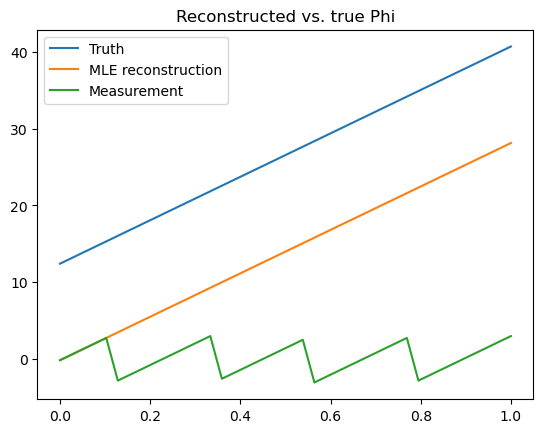

In [20]:
plt.plot(grid, phi, label="Truth")
plt.plot(grid, reconstructed_phi, label="MLE reconstruction")
plt.plot(grid, psi, label="Measurement")
plt.title("Reconstructed vs. true Phi")
plt.legend()
plt.show()

# Function for doing MLE in 1D

In [108]:
def solve_D2_MLE_1D(psi, weights=None):
    """Given a 1D wrapped phase vector psi, computes the MLE estimator corresponding to the D2 data fidelity term."""

    # Figure out shape
    n = len(psi)

    # Build F matrix
    F = np.eye(n)
    np.fill_diagonal(F[1:], -1)
    F = F[1:,:]

    # 
    # Make $\phi_1$
    phi1 = np.zeros(N)
    phi1[0] = psi[0]

    # Build the undersampling matrix
    P = np.eye(N)[1:,:].T

    # Set initial weights
    if weights is None:
        weights = np.ones(F.shape[0])
    else:
        assert len(weights) == len(psi), "psi and weight vector must have same length!"

    # rhs vector
    rhs = P.T @ F.T @ np.diag(weights) @ ( wrap_function(F @ psi) - (F @ phi1) )

    # Q matrix
    Q = P.T @ F.T @ np.diag(weights) @ F @ P  

    # Solve system for answer
    phi2 = np.linalg.solve(Q, rhs)

    # Append first entry
    reconstructed_phi = np.zeros(N)
    reconstructed_phi[1:] = phi2
    reconstructed_phi[0] = psi[0]

    return reconstructed_phi
    

In [23]:
P @ np.ones(39)

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [22]:
P = np.eye(N)[1:,:].T
P.shape

(40, 39)

# Less sampling points?

In [109]:
N = 15
phi = np.linspace(0, 9*np.pi, N) + (3*np.pi) + 3
grid = np.linspace(0,1,N)

psi = wrap_function(phi)

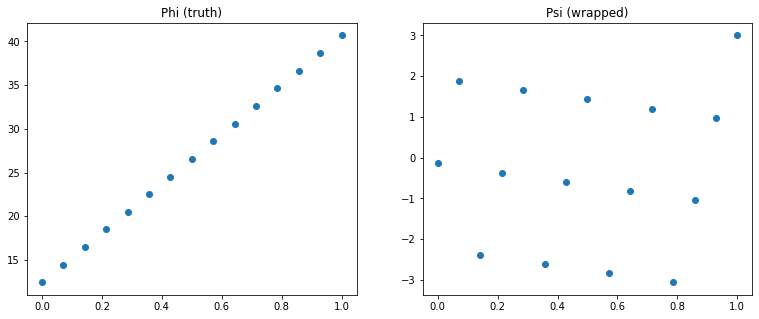

In [110]:
fig, axs = plt.subplots(1,2,figsize=(13,5))

axs[0].scatter(grid, phi)
axs[1].scatter(grid, psi)
axs[0].set_title("Phi (truth)")
axs[1].set_title("Psi (wrapped)")

plt.show()

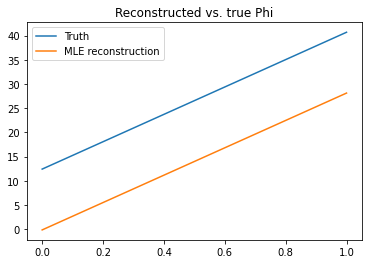

In [111]:
reconstructed_phi = solve_D2_MLE_1D(psi)
         
plt.plot(grid, phi, label="Truth")
plt.plot(grid, reconstructed_phi, label="MLE reconstruction")
plt.title("Reconstructed vs. true Phi")
plt.legend()
plt.show()

# Piecewise linear signal?

In [118]:
N = 40
phi = np.linspace(0, 9*np.pi, N) + (3*np.pi) + 3
phi[20:] += 1.5
phi[30:] += 1
grid = np.linspace(0,1,N)

psi = wrap_function(phi)

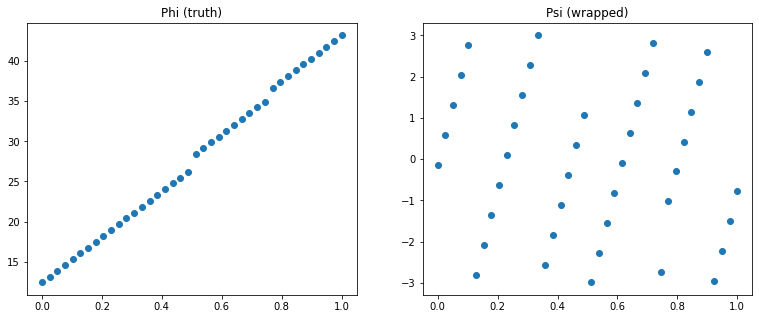

In [119]:
fig, axs = plt.subplots(1,2,figsize=(13,5))

axs[0].scatter(grid, phi)
axs[1].scatter(grid, psi)
axs[0].set_title("Phi (truth)")
axs[1].set_title("Psi (wrapped)")

plt.show()

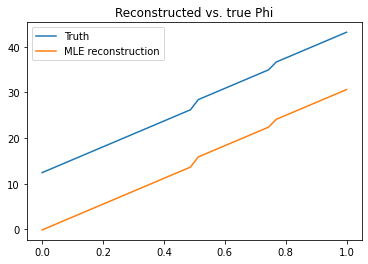

In [120]:
reconstructed_phi = solve_D2_MLE_1D(psi)
         
plt.plot(grid, phi, label="Truth")
plt.plot(grid, reconstructed_phi, label="MLE reconstruction")
plt.title("Reconstructed vs. true Phi")
plt.legend()
plt.show()

In [121]:
N = 40
phi = np.linspace(0, 9*np.pi, N) + (3*np.pi) + 3
phi[20:] += 2.5
phi[30:] += 4
grid = np.linspace(0,1,N)

psi = wrap_function(phi)

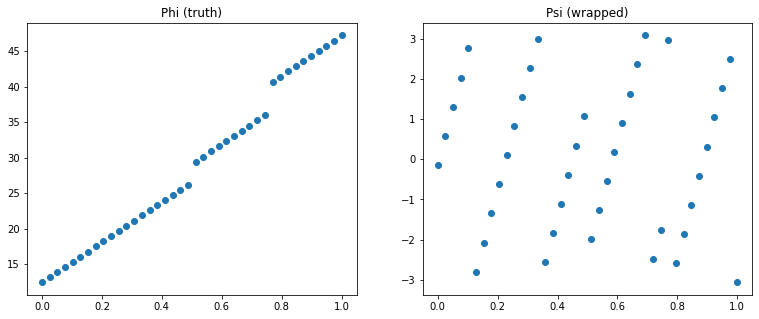

In [122]:
fig, axs = plt.subplots(1,2,figsize=(13,5))

axs[0].scatter(grid, phi)
axs[1].scatter(grid, psi)
axs[0].set_title("Phi (truth)")
axs[1].set_title("Psi (wrapped)")

plt.show()

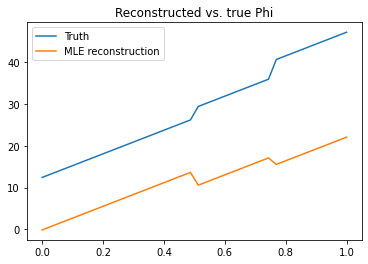

In [123]:
reconstructed_phi = solve_D2_MLE_1D(psi)
         
plt.plot(grid, phi, label="Truth")
plt.plot(grid, reconstructed_phi, label="MLE reconstruction")
plt.title("Reconstructed vs. true Phi")
plt.legend()
plt.show()

# Sinusoidal with trend?

In [134]:
N = 100
phi = np.linspace(0, 9*np.pi, N) + (3*np.pi) + 3
grid = np.linspace(0,1,N)
phi += 2*np.cos( 50*grid )

psi = wrap_function(phi)

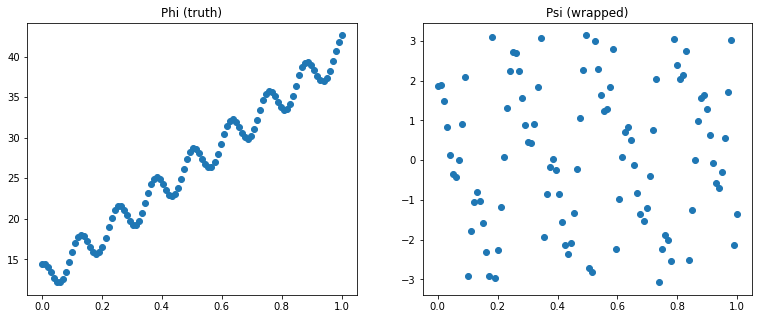

In [135]:
fig, axs = plt.subplots(1,2,figsize=(13,5))

axs[0].scatter(grid, phi)
axs[1].scatter(grid, psi)
axs[0].set_title("Phi (truth)")
axs[1].set_title("Psi (wrapped)")

plt.show()

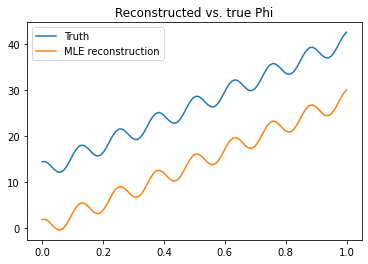

In [136]:
reconstructed_phi = solve_D2_MLE_1D(psi)
         
plt.plot(grid, phi, label="Truth")
plt.plot(grid, reconstructed_phi, label="MLE reconstruction")
plt.title("Reconstructed vs. true Phi")
plt.legend()
plt.show()

In [146]:
N = 100
phi = np.linspace(0, 9*np.pi, N) + (3*np.pi) + 3
grid = np.linspace(0,1,N)
phi += 4*np.cos( 50*grid )

psi = wrap_function(phi)

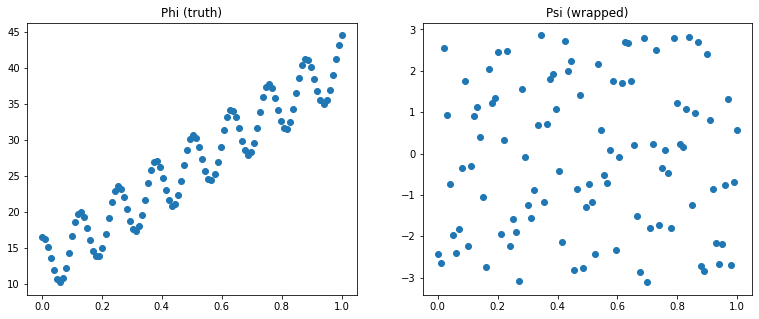

In [147]:
fig, axs = plt.subplots(1,2,figsize=(13,5))

axs[0].scatter(grid, phi)
axs[1].scatter(grid, psi)
axs[0].set_title("Phi (truth)")
axs[1].set_title("Psi (wrapped)")

plt.show()

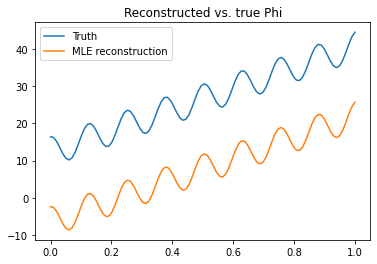

In [149]:
reconstructed_phi = solve_D2_MLE_1D(psi)
         
plt.plot(grid, phi, label="Truth")
plt.plot(grid, reconstructed_phi, label="MLE reconstruction")
plt.title("Reconstructed vs. true Phi")
plt.legend()
plt.show()

In [142]:
N = 50
phi = np.linspace(0, 9*np.pi, N) + (3*np.pi) + 3
grid = np.linspace(0,1,N)
phi += 4*np.cos( 100*grid )

psi = wrap_function(phi)

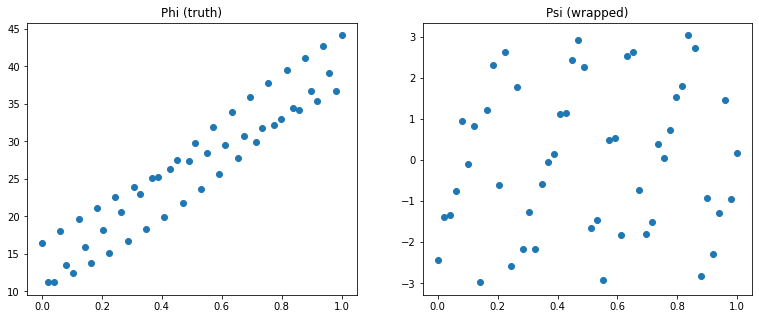

In [143]:
fig, axs = plt.subplots(1,2,figsize=(13,5))

axs[0].scatter(grid, phi)
axs[1].scatter(grid, psi)
axs[0].set_title("Phi (truth)")
axs[1].set_title("Psi (wrapped)")

plt.show()

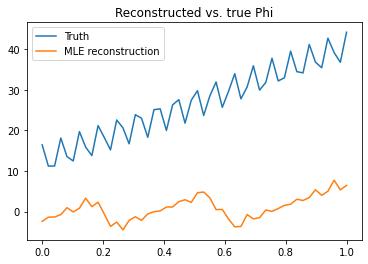

In [145]:
reconstructed_phi = solve_D2_MLE_1D(psi)
         
plt.plot(grid, phi, label="Truth")
plt.plot(grid, reconstructed_phi, label="MLE reconstruction")
plt.title("Reconstructed vs. true Phi")
plt.legend()
plt.show()